In [1]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

In [ ]:
from src.functions.data_generation import DataGeneration

synthetic_data = DataGeneration.generate_data(
    n_samples=10000,
    n_features=5,
    relationship='friedman1',
    noise=0.1,
    random_state=2025
)

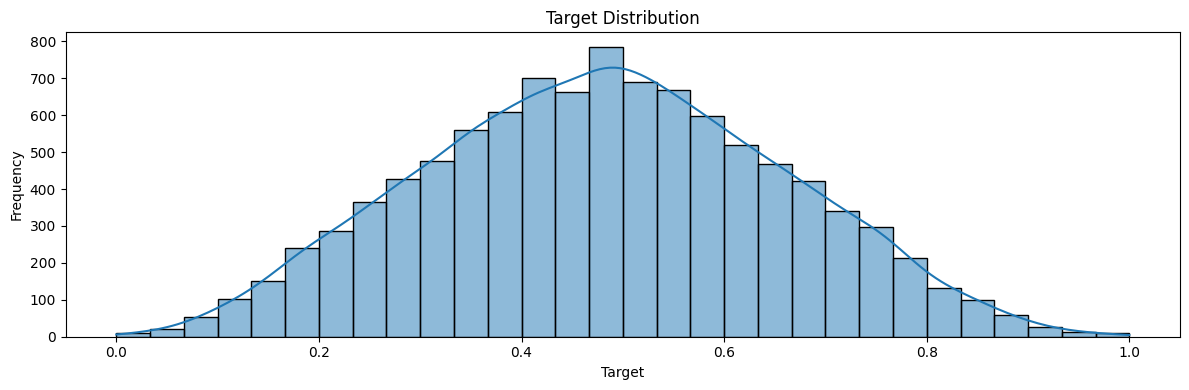

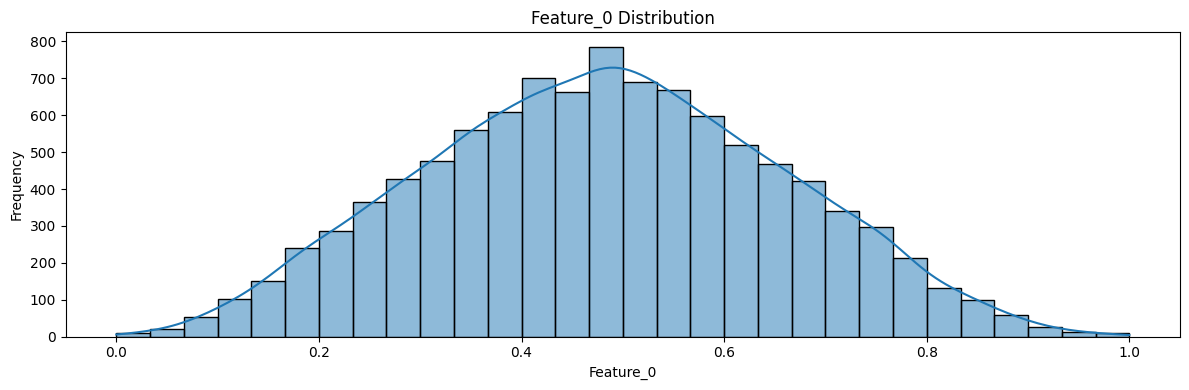

Processing runs:   0%|          | 0/200 [00:00<?, ?it/s]

Proper train set size: 80
Train set size: 64
Calibration set size: 16
Test set size: 20
Significance and Coverage level (assuming they are the same): 22.0%
----------------------------------------


Processing runs:  12%|█▏        | 23/200 [00:06<00:33,  5.22it/s]

In [ ]:
from src.main import Main

utility_config = {
    'threshold': 0.5,
    'tp': 1,
    'tn': 1,
    'fp': -10,
    'fn': 0
}

method_config = {
    'mode': "Inductive",
    'run_v1': False,
    'run_v2': True,
    'run_predictive': False,
}

data_config = {
    'data': synthetic_data,
    'n_runs': 200,
    'sample_size': 100,
    'test_size': 0.2,
    'cal_size': 0.2,
    'random_state': 2025
}

models_config = {
    'include_ridge': False,
    'include_knn': True,
    'include_krr': True,
    'include_bayes_ridge': False,
    'include_gp': False
}

plot_config = {
    'plot_distributions': True,
    'print_split': True,
    'plot_average_utility': True,
    'plot_cumulative_regret': True,
    'plot_confidence': 0.95
}

model_selection_config = {
    'n_splits': 5,
    'search_space_knn': {
        'n_neighbors': [1, 3, 5, 7, 10, 15, 20],
    },
    'search_space_ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'search_space_krr': {
        'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
        'kernel__k1__constant_value': [ 1e-2, 1e-1, 1e0, 1e1, 1e2],
        'kernel__k2__length_scale': [1e-2, 1e-1, 1e0, 1e1, 1e2]
    }
}

main = Main(
    threshold=utility_config["threshold"],
    tp=utility_config["tp"],
    tn=utility_config["tn"],
    fp=utility_config["fp"],
    fn=utility_config["fn"]
)
main.run_experiment(
    mode=method_config["mode"],
    run_v1=method_config["run_v1"],
    run_v2=method_config["run_v2"],
    run_predictive=method_config["run_predictive"],

    data=data_config["data"],
    n_runs=data_config["n_runs"],
    sample_size=data_config["sample_size"],
    test_size=data_config["test_size"],
    cal_size=data_config["cal_size"],
    random_state=data_config["random_state"],

    include_ridge=models_config["include_ridge"],
    include_knn=models_config["include_knn"],
    include_krr=models_config["include_krr"],
    include_bayesian_ridge=models_config["include_bayes_ridge"],
    include_gp=models_config["include_gp"],

    plot_distributions=plot_config["plot_distributions"],
    print_split=plot_config["print_split"],
    plot_average_utility=plot_config["plot_average_utility"],
    plot_cumulative_regret=plot_config["plot_cumulative_regret"],
    plot_confidence=plot_config["plot_confidence"],

    n_splits=model_selection_config["n_splits"],
    search_space_knn=model_selection_config["search_space_knn"],
    search_space_ridge=model_selection_config["search_space_ridge"],
    search_space_krr=model_selection_config["search_space_krr"]
)